In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
## Data Preparation
def encode(train,test):
    le=LabelEncoder().fit(train.species)
    labels = le.transform(train.species)
    classes = list(le.classes_)
    test_ids = test.id
    
    train = train.drop(['species','id'],axis=1)
    test = test.drop(['id'],axis=1)
    
    return train,labels,test,test_ids,classes

train,labels,test,test_ids,classes = encode(train,test)

train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [9]:
## Stratified Shuffle Split Train/Test

sss = StratifiedShuffleSplit(labels,10,test_size=0.2,random_state = 23)

for train_index,test_index in sss:
    X_train,X_test = train.values[train_index],train.values[test_index]
    y_train,y_test = labels[train_index],labels[test_index]

In [11]:
## Sklearn Classifier Showdown

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# We have imported 10 Classifiers which will obviously perform better after tuning their HYPER--PARAMETERS, but this gives you a
#    basic ballpart idea:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [17]:
## Loging in for Visual Comparision 

log_cols = ['Classifier','Accuracy','Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train,y_train)
    
    names = clf.__class__.__name__
    
    print("="*30)
    print(names)
    
    print("***---Result---***")
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy : {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test,train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[names,acc*100,ll]], columns=log_cols)
    log=log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
***---Result---***
Accuracy : 88.8889%
Log Loss: 1.5755075129933762
SVC
***---Result---***
Accuracy : 81.8182%
Log Loss: 4.6178737220696995
NuSVC
***---Result---***
Accuracy : 88.3838%
Log Loss: 2.501780827573887
DecisionTreeClassifier
***---Result---***
Accuracy : 64.6465%
Log Loss: 12.21067852345337
RandomForestClassifier
***---Result---***
Accuracy : 90.9091%
Log Loss: 0.7447634770322867
AdaBoostClassifier
***---Result---***
Accuracy : 4.5455%
Log Loss: 4.202877746190806
GradientBoostingClassifier
***---Result---***
Accuracy : 59.0909%
Log Loss: 2.332670572387591
GaussianNB
***---Result---***
Accuracy : 57.0707%
Log Loss: 14.827252492813216
LinearDiscriminantAnalysis
***---Result---***
Accuracy : 97.9798%
Log Loss: 0.9301977763139299
QuadraticDiscriminantAnalysis
***---Result---***
Accuracy : 1.5152%
Log Loss: 34.01546160104849


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discri

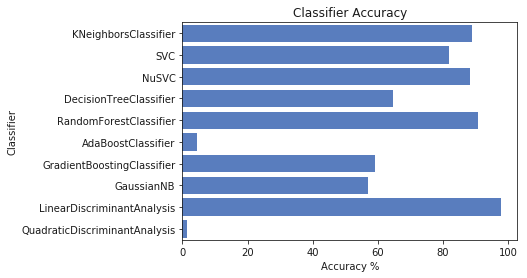

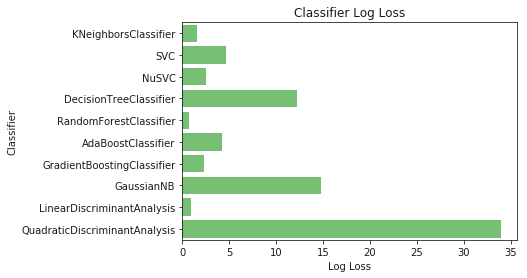

In [19]:
## Lets see the graph of Accuracy and Log Loss
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()